In [1]:
import gym
from tetris_env_2 import TetrisEnv
from gym import spaces

from gym import ObservationWrapper

import logging
import os, sys
import matplotlib.pyplot as plt
import numpy as np

from main import dqn

In [ ]:
dqn()

In [2]:
env = TetrisEnv()

In [3]:
env.game_state.fallingPiece

{'shape': 'L', 'rotation': 0, 'x': 3, 'y': 1, 'color': 2}

In [4]:
state, reward, done, info = env.step(0)

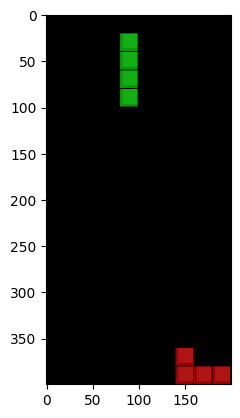

In [5]:
%matplotlib inline
# env.reset()

# state, reward, done, info = env.step(3)
plt.imshow(env.render(mode='rgb_array'))
plt.show()

In [5]:
import time

In [2]:
env = TetrisEnv()

In [6]:
for i in range(10000):
    action = env.action_space.sample()
    env.step(action)
    time.sleep(0.1)


KeyboardInterrupt: 

In [4]:
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import CheckpointCallback
import torch

In [5]:
env = TetrisEnv()
policy_kwargs = {
    "net_arch": [32, 32],  # Custom network architecture
    "activation_fn": torch.nn.ReLU  # Custom activation function
}
model = DQN("MlpPolicy", env, verbose=1, tensorboard_log="./tetris_tensorboard/", learning_rate=0.001, policy_kwargs=policy_kwargs, gamma=0.99, 
    buffer_size=30000, exploration_fraction=0.75, exploration_initial_eps=1.0, exploration_final_eps=0.1,)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\limja\anaconda3\envs\Pytorch\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [6]:
# custom learn 
num_episodes = 1000  # Number of episodes to train on

for episode in range(num_episodes):
    obs = env.reset()  # Reset the environment at the start of each episode
    done = False
    while not done:
        action, _states = model.predict(obs, deterministic=False)
        new_obs, reward, done, info = env.step(action)  # Take an action
        
        # Store the transition in the replay buffer
        action = np.array([action])
        model.replay_buffer.add(obs, new_obs, action, reward, done, info)
        
        obs = new_obs
        
        # Check if a new piece is falling or any other custom condition
        if info.get('new_piece_falling', False):
            # Perform a learning step
            model.train()

ValueError: could not broadcast input array from shape (0,) into shape (1,)

In [9]:
model.learn(total_timesteps=int(1e5), reset_num_timesteps=False)

Logging to ./tetris_tensorboard/DQN_9
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 227      |
|    ep_rew_mean      | -14.3    |
|    exploration_rate | 0.398    |
| time/               |          |
|    episodes         | 960      |
|    fps              | 890      |
|    time_elapsed     | 0        |
|    total_timesteps  | 100264   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0236   |
|    n_updates        | 12565    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 224      |
|    ep_rew_mean      | -13.3    |
|    exploration_rate | 0.395    |
| time/               |          |
|    episodes         | 964      |
|    fps              | 888      |
|    time_elapsed     | 1        |
|    total_timesteps  | 100913   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss        

In [ ]:
%matplotlib inline
obs = env.reset()
actions = []
for i in range(1000):
    action, _states = model.predict(obs)
    actions.append(action)
    state, reward, done, info = env.step(action)

    if i % 10 == 0:
        plt.imshow(env.render(mode='rgb_array'))
        plt.show()
    if done:
        print("Episode finished after {} timesteps".format(i+1))
        break

In [51]:
actions

[array(2, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(2, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(4, dtype=int64),
 array(0, dtype=int64),
 array(3, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=int64),
 array(5, dtype=